# import dibreries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clean the data

In [13]:
# Read the dataset
df = pd.read_csv('WineQT.csv')
display("Original dataset:" , df.shape, df.head(1)) ; print() ;

# Print initial information
print("Initial dataset information:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nMissing values per column:")
print(df.isnull().sum())

# Remove the 'Id' column
df = df.drop('Id', axis=1)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()

# Ensure all columns are numeric
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Check for outliers using IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers per column:")
print(outliers)

# Optionally, remove outliers
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print final information
print("\nFinal dataset information:")
print(f"Number of rows after cleaning: {len(df)}")
print(f"Number of columns after cleaning: {len(df.columns)}")
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Save cleaned dataset
print("\nCleaned dataset saved as 'WineQT_cleaned.csv'")
display("Cleaned dataset:", df.shape, df.head(1))

'Original dataset:'

(1143, 13)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0



Initial dataset information:
Number of rows: 1143
Number of columns: 13

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Number of duplicate rows: 125

Outliers per column:
fixed acidity           37
volatile acidity        10
citric acid              1
residual sugar          95
chlorides               71
free sulfur dioxide     16
total sulfur dioxide    33
density                 30
pH                      24
sulphates               41
alcohol                  6
quality                 21
dtype: int64

Final dataset information:
Number of rows after cleaning: 1018
Number of columns after cleaning: 12

Missing values after cleaning:
fixed acidity           0

'Cleaned dataset:'

(1018, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory data analysis

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1018 non-null   float64
 1   volatile acidity      1018 non-null   float64
 2   citric acid           1018 non-null   float64
 3   residual sugar        1018 non-null   float64
 4   chlorides             1018 non-null   float64
 5   free sulfur dioxide   1018 non-null   float64
 6   total sulfur dioxide  1018 non-null   float64
 7   density               1018 non-null   float64
 8   pH                    1018 non-null   float64
 9   sulphates             1018 non-null   float64
 10  alcohol               1018 non-null   float64
 11  quality               1018 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 95.6 KB
None

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    

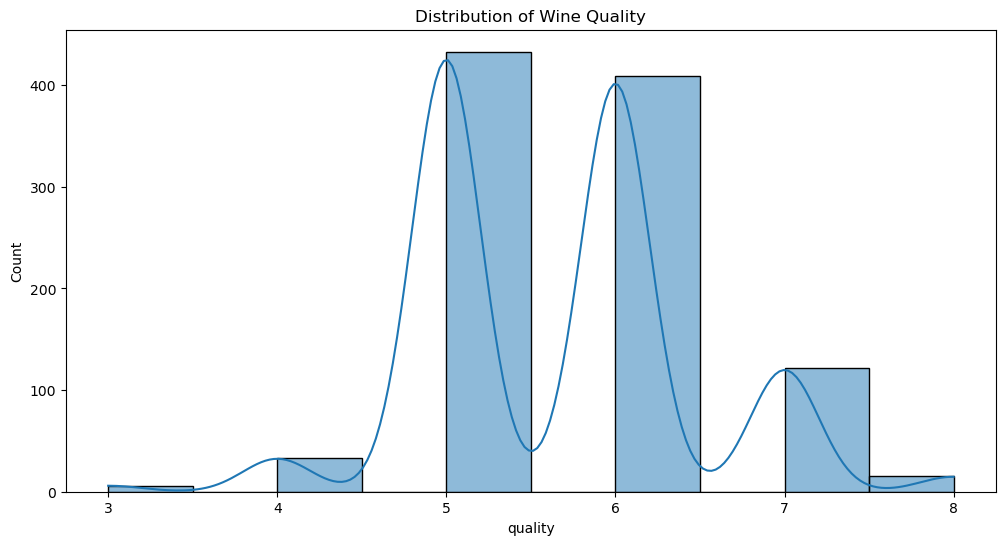

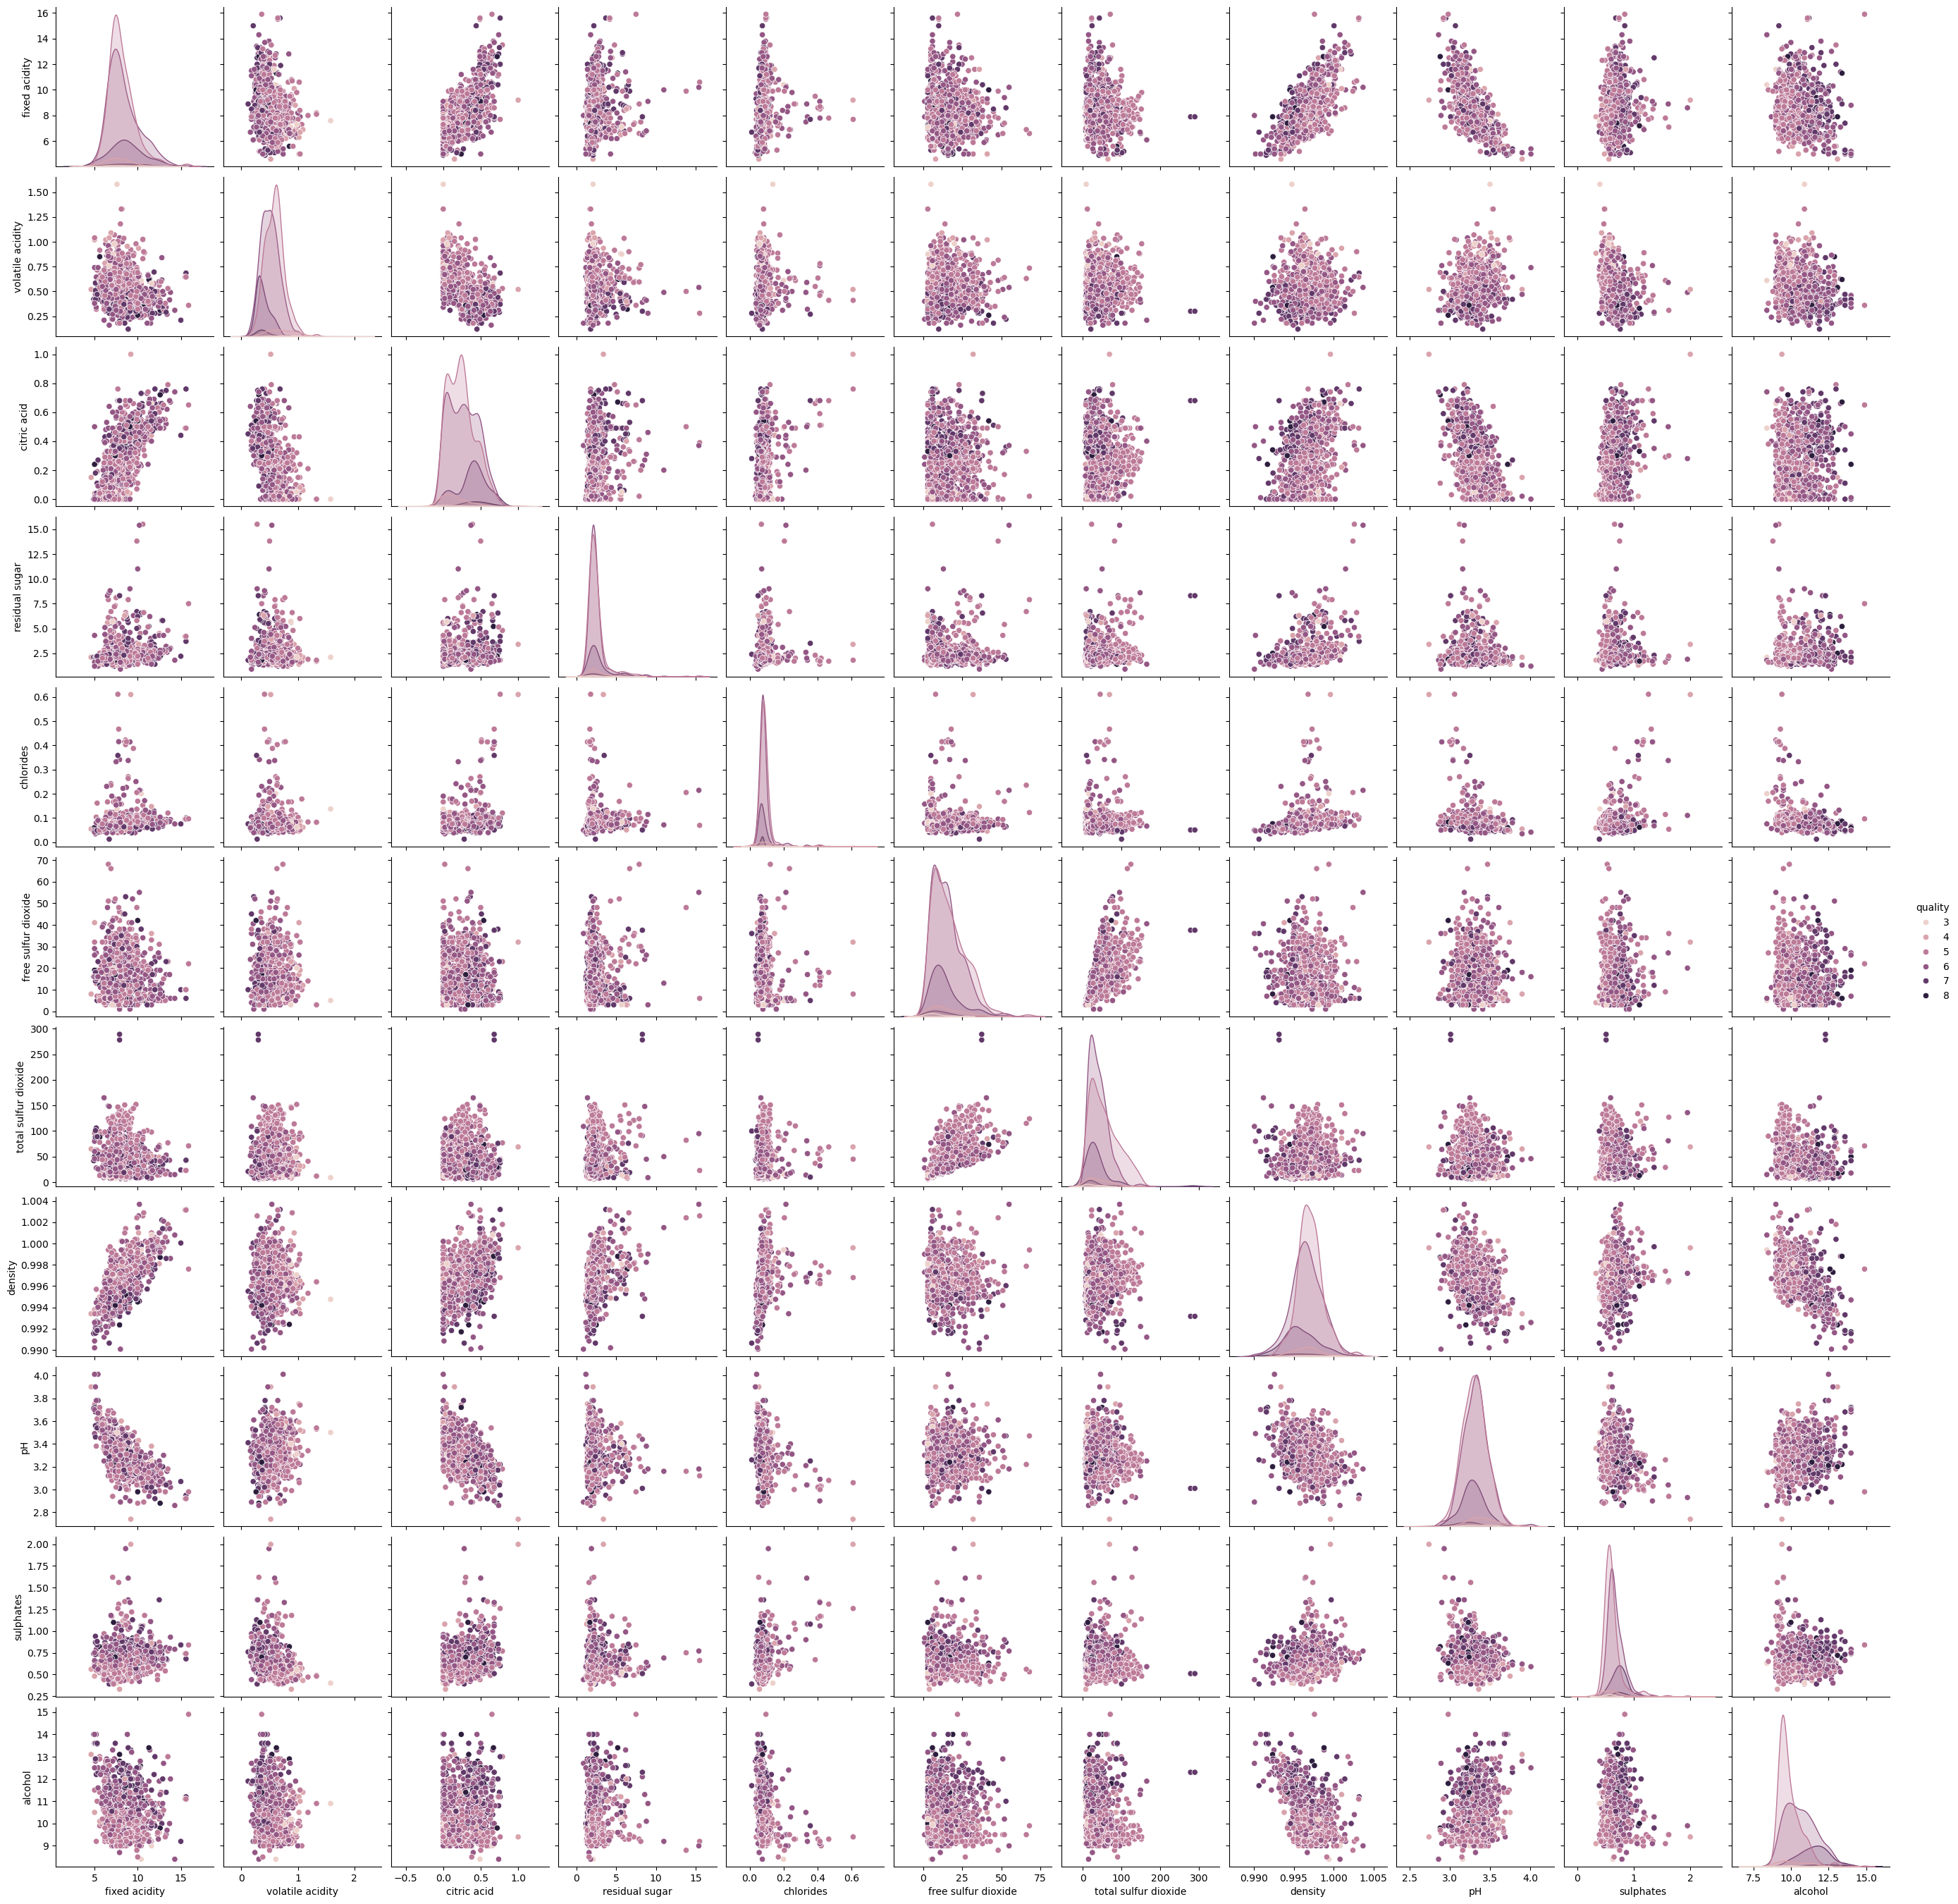

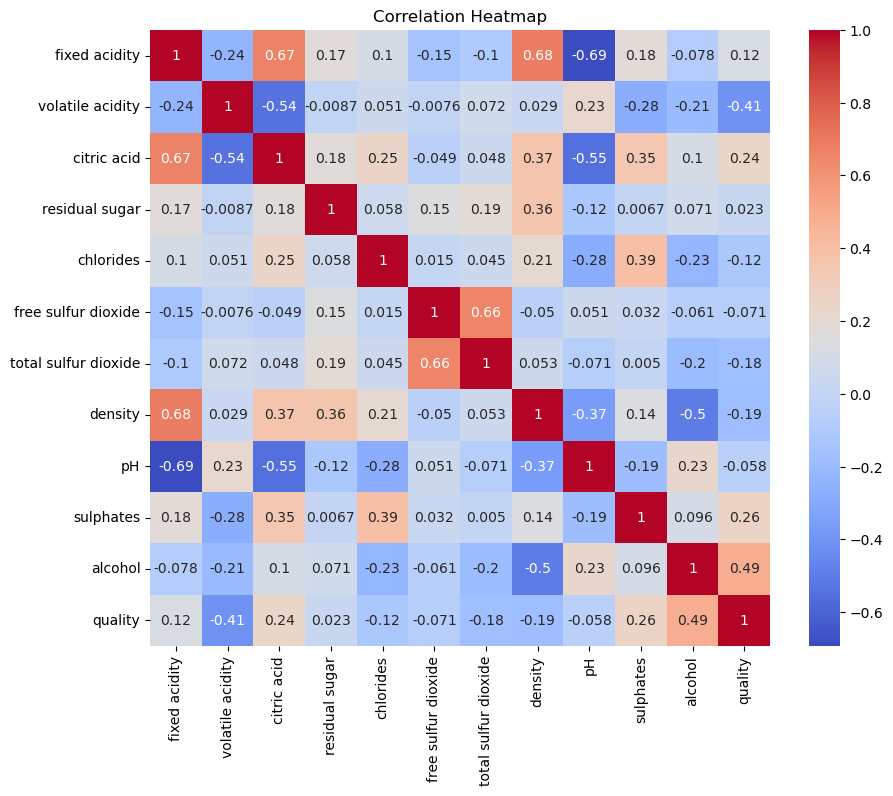

In [14]:
# Load the cleaned dataset
df = pd.read_csv('WineQT_cleaned.csv')

# Display basic information
print("Dataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Visualize distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['quality'], bins=10, kde=True)
plt.title('Distribution of Wine Quality')
plt.show()

# Pairplot for relationships
sns.pairplot(df, hue='quality')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Machine learning algorithems

Decision Tree Accuracy: 0.47058823529411764
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        12
           2       0.59      0.61      0.60        84
           3       0.43      0.45      0.44        74
           4       0.44      0.48      0.46        25
           5       0.00      0.00      0.00         7

    accuracy                           0.47       204
   macro avg       0.24      0.26      0.25       204
weighted avg       0.45      0.47      0.46       204

Random Forest Accuracy: 0.5343137254901961
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        12
           2       0.59      0.67      0.63        84
           3       0.47      0.57      0.52        74
           4       0.58      0.44      0.50        25
           5       0.00      0.00      0.00  

/home/samaneh/miniconda3/envs/wine_quality/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samaneh/miniconda3/envs/wine_quality/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samaneh/miniconda3/envs/wine_quality/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

XGBoost Accuracy: 0.5245098039215687
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        12
           2       0.57      0.64      0.61        84
           3       0.47      0.55      0.51        74
           4       0.63      0.48      0.55        25
           5       0.00      0.00      0.00         7

    accuracy                           0.52       204
   macro avg       0.28      0.28      0.28       204
weighted avg       0.48      0.52      0.50       204



/home/samaneh/miniconda3/envs/wine_quality/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samaneh/miniconda3/envs/wine_quality/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samaneh/miniconda3/envs/wine_quality/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

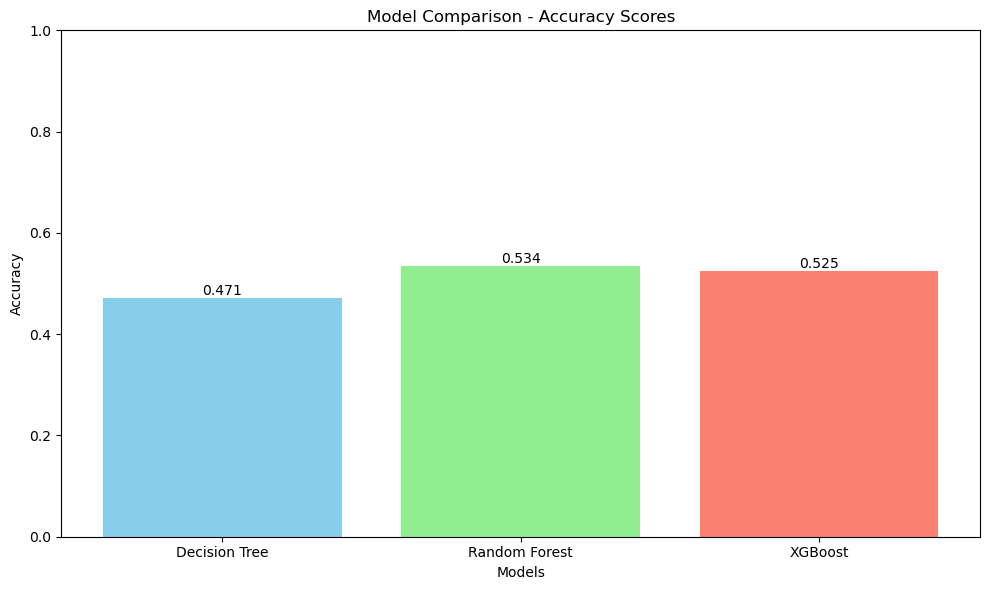

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('WineQT_cleaned.csv')

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Map quality ratings to start from 0
y = y - y.min()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results dictionary
results = {}

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
results['Decision Tree'] = dt_accuracy
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_accuracy
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
results['XGBoost'] = xgb_accuracy
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_pred))

# Create comparison plot
plt.figure(figsize=(10, 6))
models = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show() 

# Test for new data

In [21]:
# Test for new data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create sample new wine data
new_wines = pd.DataFrame({
    'fixed acidity': [7.4, 7.8, 7.1],
    'volatile acidity': [0.7, 0.88, 0.28],
    'citric acid': [0.0, 0.0, 0.4],
    'residual sugar': [1.9, 2.6, 1.9],
    'chlorides': [0.076, 0.098, 0.05],
    'free sulfur dioxide': [11.0, 25.0, 14.0],
    'total sulfur dioxide': [34.0, 67.0, 30.0],
    'density': [0.9978, 0.9968, 0.9940],
    'pH': [3.51, 3.2, 3.19],
    'sulphates': [0.56, 0.68, 0.49],
    'alcohol': [9.4, 9.8, 9.9]
})

# Scale the new data using the same scaler used in training
scaler = StandardScaler()
new_wines_scaled = scaler.fit_transform(new_wines)

# Make predictions using all three models
dt_pred = dt_model.predict(new_wines_scaled)
rf_pred = rf_model.predict(new_wines_scaled)
xgb_pred = xgb_model.predict(new_wines_scaled)

# Print predictions
print("Decision Tree Predictions:", dt_pred)
print("Random Forest Predictions:", rf_pred)
print("XGBoost Predictions:", xgb_pred)

# Map predictions back to original quality scale (3-8)
dt_quality = [pred + 3 for pred in dt_pred]
rf_quality = [pred + 3 for pred in rf_pred]
xgb_quality = [pred + 3 for pred in xgb_pred]

print("\nPredicted Wine Quality (scale 3-8):")
for i in range(len(new_wines)):
    print(f"Sample {i+1}:")
    print(f"  Decision Tree: {dt_quality[i]}")
    print(f"  Random Forest: {rf_quality[i]}")
    print(f"  XGBoost:       {xgb_quality[i]}")


Decision Tree Predictions: [3 1 3]
Random Forest Predictions: [2 3 3]
XGBoost Predictions: [2 0 2]

Predicted Wine Quality (scale 3-8):
Sample 1:
  Decision Tree: 6
  Random Forest: 5
  XGBoost:       5
Sample 2:
  Decision Tree: 4
  Random Forest: 6
  XGBoost:       3
Sample 3:
  Decision Tree: 6
  Random Forest: 6
  XGBoost:       5


/home/samaneh/miniconda3/envs/wine_quality/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/samaneh/miniconda3/envs/wine_quality/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
